<h1>Analysis on Virat Kohli's Test Career</h1>
<p>Virat Kohli is brilliant cricketer of the current generation. Let's Analyse his Test career from the data of ESPNCricinfo </p>

In [1]:
import pandas as pd
import numpy as np
vkstats = pd.read_html("https://stats.espncricinfo.com/ci/engine/player/253802.html?class=1;template=results;type=batting;view=innings")

In [2]:
Test = vkstats[3]
Test

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,4,13,10,1,0,40.00,5,caught,1,NaN,v West Indies,Kingston,20 Jun 2011,Test # 1997
1,15,72,54,2,0,27.77,5,caught,3,NaN,v West Indies,Kingston,20 Jun 2011,Test # 1997
2,0,1,2,0,0,0.00,5,caught,1,NaN,v West Indies,Bridgetown,28 Jun 2011,Test # 1998
3,27,118,107,1,1,25.23,5,caught,3,NaN,v West Indies,Bridgetown,28 Jun 2011,Test # 1998
4,30,62,53,2,0,56.60,5,caught,2,NaN,v West Indies,Roseau,6 Jul 2011,Test # 1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,1,8,5,0,0,20.00,4,lbw,1,NaN,v Bangladesh,Chattogram,14 Dec 2022,Test # 2481
181,19*,40,29,0,0,65.51,4,not out,3,NaN,v Bangladesh,Chattogram,14 Dec 2022,Test # 2481
182,24,91,73,3,0,32.87,4,caught,2,NaN,v Bangladesh,Mirpur,22 Dec 2022,Test # 2484
183,1,20,22,0,0,4.54,5,caught,4,NaN,v Bangladesh,Mirpur,22 Dec 2022,Test # 2484


In [3]:
Test.Runs.unique()

array(['4', '15', '0', '27', '30', 'DNB', '52', '63', '11', '23', '9',
       '44', '75', '116', '22', '58', '103', '51*', '19', '14*', '7', '6',
       '20', '107', '34', '67*', '1', '41', '3', '57', '119', '96', '46',
       '67', '38', '105*', '8', '25', '39', '28', '115', '141', '169',
       '54', '147', '14', '78', '10', '18', '21', '29', '16', '88', '200',
       'TDNB', '45', '211', '17', '40', '49*', '167', '81', '62', '6*',
       '235', '204', '13', '12', '103*', '42', '104*', '213', '243', '50',
       '5', '153', '149', '51', '97', '49', '139', '123', '82', '76',
       '31*', '254*', '136', '2', '74', '72', '55', '36', '35', '79',
       '19*', '24'], dtype=object)

In [4]:
Test.isna().sum()

Runs             0
Mins             0
BF               0
4s               0
6s               0
SR               0
Pos              0
Dismissal        0
Inns             0
Unnamed: 9     185
Opposition       0
Ground           0
Start Date       0
Unnamed: 13      0
dtype: int64

<b>Removing and Editing the values in Runs Columns </b>

In [5]:
def removeStar(data):
    if data == 'DNB' or data == 'TDNB':
        return None
    runs = data.split('*')
    return int(runs[0])

In [6]:
Test.Runs = Test.Runs.apply(removeStar)

In [7]:
Test.isna().sum()

Runs             8
Mins             0
BF               0
4s               0
6s               0
SR               0
Pos              0
Dismissal        0
Inns             0
Unnamed: 9     185
Opposition       0
Ground           0
Start Date       0
Unnamed: 13      0
dtype: int64

In [8]:
Test.drop('Unnamed: 9',inplace=True,axis='columns')

In [9]:
Test.dropna(inplace=True)

In [10]:
Test.Runs.sum()

8119.0

<AxesSubplot:xlabel='Runs', ylabel='Count'>

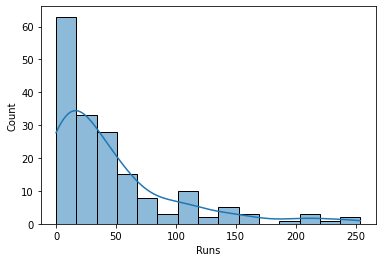

In [11]:
import seaborn as sn
sn.histplot(Test['Runs'],kde=True)

c:\users\pandy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Runs'>

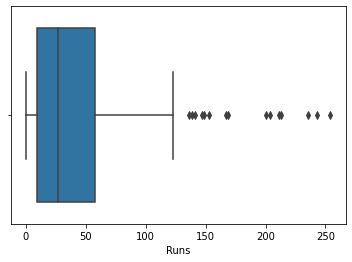

In [12]:
sn.boxplot(Test['Runs'])

In [13]:
Test['zscores'] = (Test['Runs'] - Test.Runs.mean())/Test.Runs.std()

In [14]:
Test

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Unnamed: 13,zscores
0,4.0,13,10,1,0,40.00,5,caught,1,v West Indies,Kingston,20 Jun 2011,Test # 1997,-0.787743
1,15.0,72,54,2,0,27.77,5,caught,3,v West Indies,Kingston,20 Jun 2011,Test # 1997,-0.580789
2,0.0,1,2,0,0,0.00,5,caught,1,v West Indies,Bridgetown,28 Jun 2011,Test # 1998,-0.862999
3,27.0,118,107,1,1,25.23,5,caught,3,v West Indies,Bridgetown,28 Jun 2011,Test # 1998,-0.355021
4,30.0,62,53,2,0,56.60,5,caught,2,v West Indies,Roseau,6 Jul 2011,Test # 1999,-0.298579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,20.0,64,40,4,0,50.00,4,caught,3,v England,Birmingham,1 Jul 2022,Test # 2470,-0.486719
180,1.0,8,5,0,0,20.00,4,lbw,1,v Bangladesh,Chattogram,14 Dec 2022,Test # 2481,-0.844185
181,19.0,40,29,0,0,65.51,4,not out,3,v Bangladesh,Chattogram,14 Dec 2022,Test # 2481,-0.505533
182,24.0,91,73,3,0,32.87,4,caught,2,v Bangladesh,Mirpur,22 Dec 2022,Test # 2484,-0.411463


<AxesSubplot:xlabel='zscores', ylabel='Count'>

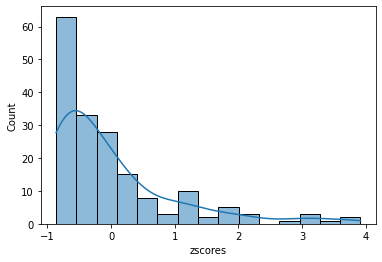

In [15]:
sn.histplot(Test['zscores'],kde='True')

In [16]:
dismissal_keys = Test.Dismissal.value_counts().keys()
dismissal_values = Test.Dismissal.value_counts().values

In [17]:
import matplotlib.pyplot as plt

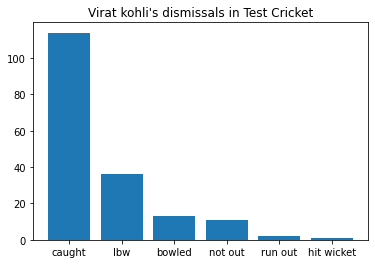

In [59]:
plt.bar(dismissal_keys,dismissal_values)
plt.title("Virat kohli's dismissals in Test Cricket")
plt.show()


<h3>Virat kohli only got bowled 13 times in his entire Test Career</h3>

In [19]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 183
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Runs         177 non-null    float64
 1   Mins         177 non-null    object 
 2   BF           177 non-null    object 
 3   4s           177 non-null    object 
 4   6s           177 non-null    object 
 5   SR           177 non-null    object 
 6   Pos          177 non-null    object 
 7   Dismissal    177 non-null    object 
 8   Inns         177 non-null    object 
 9   Opposition   177 non-null    object 
 10  Ground       177 non-null    object 
 11  Start Date   177 non-null    object 
 12  Unnamed: 13  177 non-null    object 
 13  zscores      177 non-null    float64
dtypes: float64(2), object(12)
memory usage: 20.7+ KB


<p>Replace dashes with -1</p>

In [20]:
def removeDash(data):
    if data == '-':
        return -1
    return int(data)
    

In [21]:
Test.Mins = Test.Mins.apply(removeDash)

<p>Replace -1 with Median value of Minutes column</p>

In [22]:
def fillMinswdMedian(data):
    if data == -1:
        return Test.Mins.quantile(0.5)
    return int(data)

In [23]:
Test.Mins = Test.Mins.apply(fillMinswdMedian)

<h3>Let's change the data type of following columns</h3>

In [24]:
Test.BF = Test.BF.astype('float64')

In [25]:
Test.SR = Test.SR.astype('float64')

In [26]:

Test.Inns = Test.Inns.astype('float64')
Test['4s'] = Test['4s'].astype('float64')
Test['6s'] = Test['6s'].astype('float64')

In [27]:
Test

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Unnamed: 13,zscores
0,4.0,13.0,10.0,1.0,0.0,40.00,5,caught,1.0,v West Indies,Kingston,20 Jun 2011,Test # 1997,-0.787743
1,15.0,72.0,54.0,2.0,0.0,27.77,5,caught,3.0,v West Indies,Kingston,20 Jun 2011,Test # 1997,-0.580789
2,0.0,1.0,2.0,0.0,0.0,0.00,5,caught,1.0,v West Indies,Bridgetown,28 Jun 2011,Test # 1998,-0.862999
3,27.0,118.0,107.0,1.0,1.0,25.23,5,caught,3.0,v West Indies,Bridgetown,28 Jun 2011,Test # 1998,-0.355021
4,30.0,62.0,53.0,2.0,0.0,56.60,5,caught,2.0,v West Indies,Roseau,6 Jul 2011,Test # 1999,-0.298579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,20.0,64.0,40.0,4.0,0.0,50.00,4,caught,3.0,v England,Birmingham,1 Jul 2022,Test # 2470,-0.486719
180,1.0,8.0,5.0,0.0,0.0,20.00,4,lbw,1.0,v Bangladesh,Chattogram,14 Dec 2022,Test # 2481,-0.844185
181,19.0,40.0,29.0,0.0,0.0,65.51,4,not out,3.0,v Bangladesh,Chattogram,14 Dec 2022,Test # 2481,-0.505533
182,24.0,91.0,73.0,3.0,0.0,32.87,4,caught,2.0,v Bangladesh,Mirpur,22 Dec 2022,Test # 2484,-0.411463


In [28]:
Test.drop(['Unnamed: 13','Start Date'],axis='columns',inplace=True)

In [29]:
Test

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,zscores
0,4.0,13.0,10.0,1.0,0.0,40.00,5,caught,1.0,v West Indies,Kingston,-0.787743
1,15.0,72.0,54.0,2.0,0.0,27.77,5,caught,3.0,v West Indies,Kingston,-0.580789
2,0.0,1.0,2.0,0.0,0.0,0.00,5,caught,1.0,v West Indies,Bridgetown,-0.862999
3,27.0,118.0,107.0,1.0,1.0,25.23,5,caught,3.0,v West Indies,Bridgetown,-0.355021
4,30.0,62.0,53.0,2.0,0.0,56.60,5,caught,2.0,v West Indies,Roseau,-0.298579
...,...,...,...,...,...,...,...,...,...,...,...,...
179,20.0,64.0,40.0,4.0,0.0,50.00,4,caught,3.0,v England,Birmingham,-0.486719
180,1.0,8.0,5.0,0.0,0.0,20.00,4,lbw,1.0,v Bangladesh,Chattogram,-0.844185
181,19.0,40.0,29.0,0.0,0.0,65.51,4,not out,3.0,v Bangladesh,Chattogram,-0.505533
182,24.0,91.0,73.0,3.0,0.0,32.87,4,caught,2.0,v Bangladesh,Mirpur,-0.411463


In [30]:
Test.Ground.unique()

array(['Kingston', 'Bridgetown', 'Roseau', 'Wankhede', 'Melbourne',
       'Sydney', 'Perth', 'Adelaide', 'Hyderabad', 'Bengaluru',
       'Ahmedabad', 'Eden Gardens', 'Nagpur', 'Chennai', 'Mohali',
       'Delhi', 'Johannesburg', 'Durban', 'Auckland', 'Wellington',
       'Nottingham', "Lord's", 'Southampton', 'Manchester', 'The Oval',
       'Brisbane', 'Fatullah', 'Galle', 'Colombo (PSS)', 'Colombo (SSC)',
       'North Sound', 'Gros Islet', 'Kanpur', 'Indore', 'Rajkot',
       'Visakhapatnam', 'Pune', 'Ranchi', 'Pallekele', 'Cape Town',
       'Centurion', 'Birmingham', 'Christchurch', 'Leeds', 'Chattogram',
       'Mirpur'], dtype=object)

In [31]:
home_grounds = ['Bengaluru','Delhi','Mohali','Wankhede','Hyderabad (Deccan)', 'Bengaluru',
       'Ahmedabad', 'Kolkata', 'Nagpur', 'Chennai','Kanpur', 'Indore', 'Rajkot',
       'Visakhapatnam', 'Pune', 'Ranchi','Eden Gardens']

def is_not_home(data):
    if data in home_grounds:
        return 'Home'
    return 'Away'
    

In [32]:
Test['Away_Match'] = Test.Ground.apply(is_not_home)

<h2>Final working Dataset</h2>

In [33]:
Test

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,zscores,Away_Match
0,4.0,13.0,10.0,1.0,0.0,40.00,5,caught,1.0,v West Indies,Kingston,-0.787743,Away
1,15.0,72.0,54.0,2.0,0.0,27.77,5,caught,3.0,v West Indies,Kingston,-0.580789,Away
2,0.0,1.0,2.0,0.0,0.0,0.00,5,caught,1.0,v West Indies,Bridgetown,-0.862999,Away
3,27.0,118.0,107.0,1.0,1.0,25.23,5,caught,3.0,v West Indies,Bridgetown,-0.355021,Away
4,30.0,62.0,53.0,2.0,0.0,56.60,5,caught,2.0,v West Indies,Roseau,-0.298579,Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,20.0,64.0,40.0,4.0,0.0,50.00,4,caught,3.0,v England,Birmingham,-0.486719,Away
180,1.0,8.0,5.0,0.0,0.0,20.00,4,lbw,1.0,v Bangladesh,Chattogram,-0.844185,Away
181,19.0,40.0,29.0,0.0,0.0,65.51,4,not out,3.0,v Bangladesh,Chattogram,-0.505533,Away
182,24.0,91.0,73.0,3.0,0.0,32.87,4,caught,2.0,v Bangladesh,Mirpur,-0.411463,Away


<h2>In which Inning he has scored most runs?</h2>

<AxesSubplot:xlabel='Inns', ylabel='Runs'>

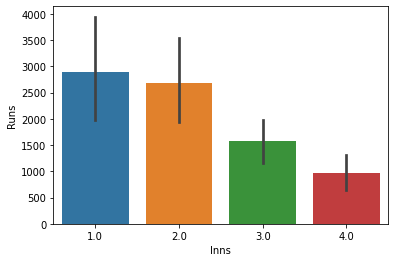

In [34]:
sn.barplot(x='Inns',y='Runs',data=Test,estimator=np.sum)

<h2>On which Indian ground Virat has scored most test runs?</h2>

<AxesSubplot:title={'center':'No. of Innings played on Indian Ground'}, xlabel='Inns', ylabel='Ground'>

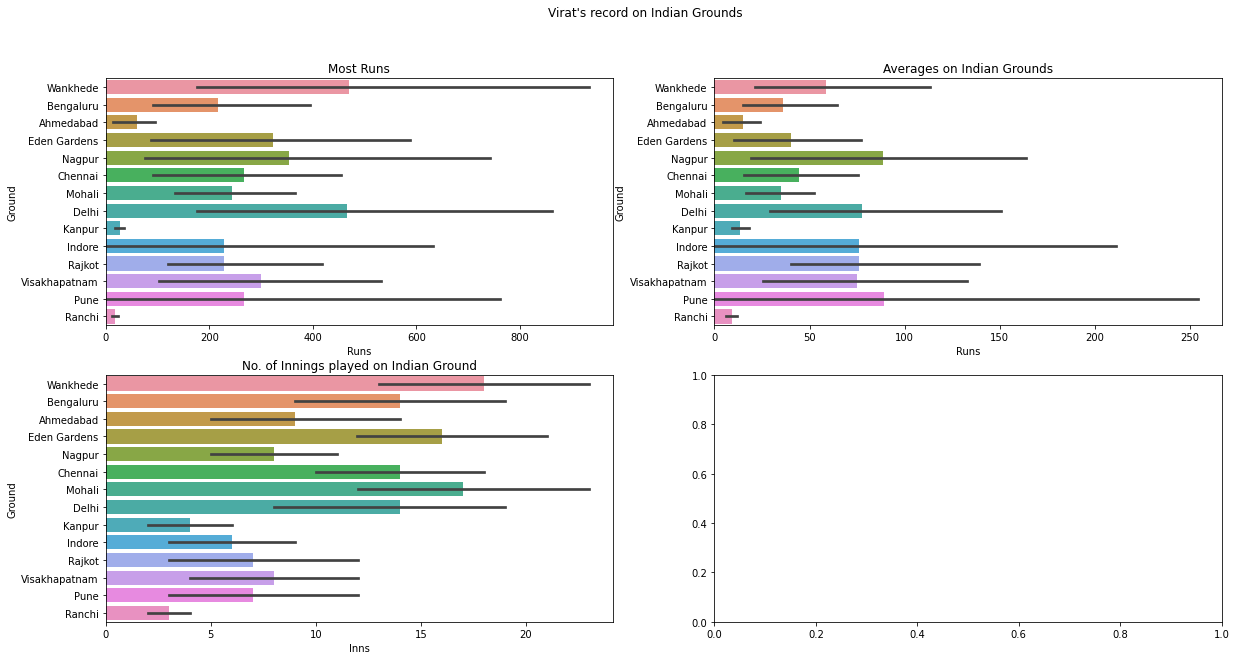

In [35]:
fig, axes = plt.subplots(2, 2,figsize=(20,10))
runs_indian_grounds = Test.loc[Test['Away_Match'] == 'Home']
fig.suptitle("Virat's record on Indian Grounds")
axes[0,0].set_title('Most Runs')
axes[0,1].set_title('Averages on Indian Grounds')
axes[1,0].set_title('No. of Innings played on Indian Ground')
sn.barplot(x='Runs',y='Ground',data=runs_indian_grounds,estimator=np.sum,orient = 'h',ax=axes[0,0])
sn.barplot(x='Runs',y='Ground',data=runs_indian_grounds,estimator=np.mean,orient = 'h',ax=axes[0,1])
sn.barplot(x='Inns',y='Ground',data=runs_indian_grounds,estimator=np.sum,orient='h',ax=axes[1,0])

<p>Ahmedabad, Ranchi, Kanpur are some grounds, Virat doesn't have much impact</p>

<h3>At what position Virat has highest Average at home</h3>

<AxesSubplot:title={'center':'Averages at each position'}, xlabel='Pos', ylabel='Runs'>

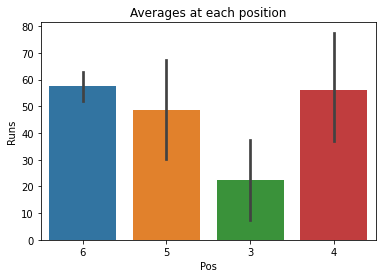

In [36]:
plt.title('Averages at each position')

sn.barplot(x='Pos',y='Runs',data=runs_indian_grounds,estimator=np.mean)

<p><b>Pretty consitent at 4, 5, 6 Position</b></p>

<h3>Record on Foreign soil</h3>

<AxesSubplot:title={'center':'No. of Innings played on Foreign Ground'}, xlabel='Inns', ylabel='Ground'>

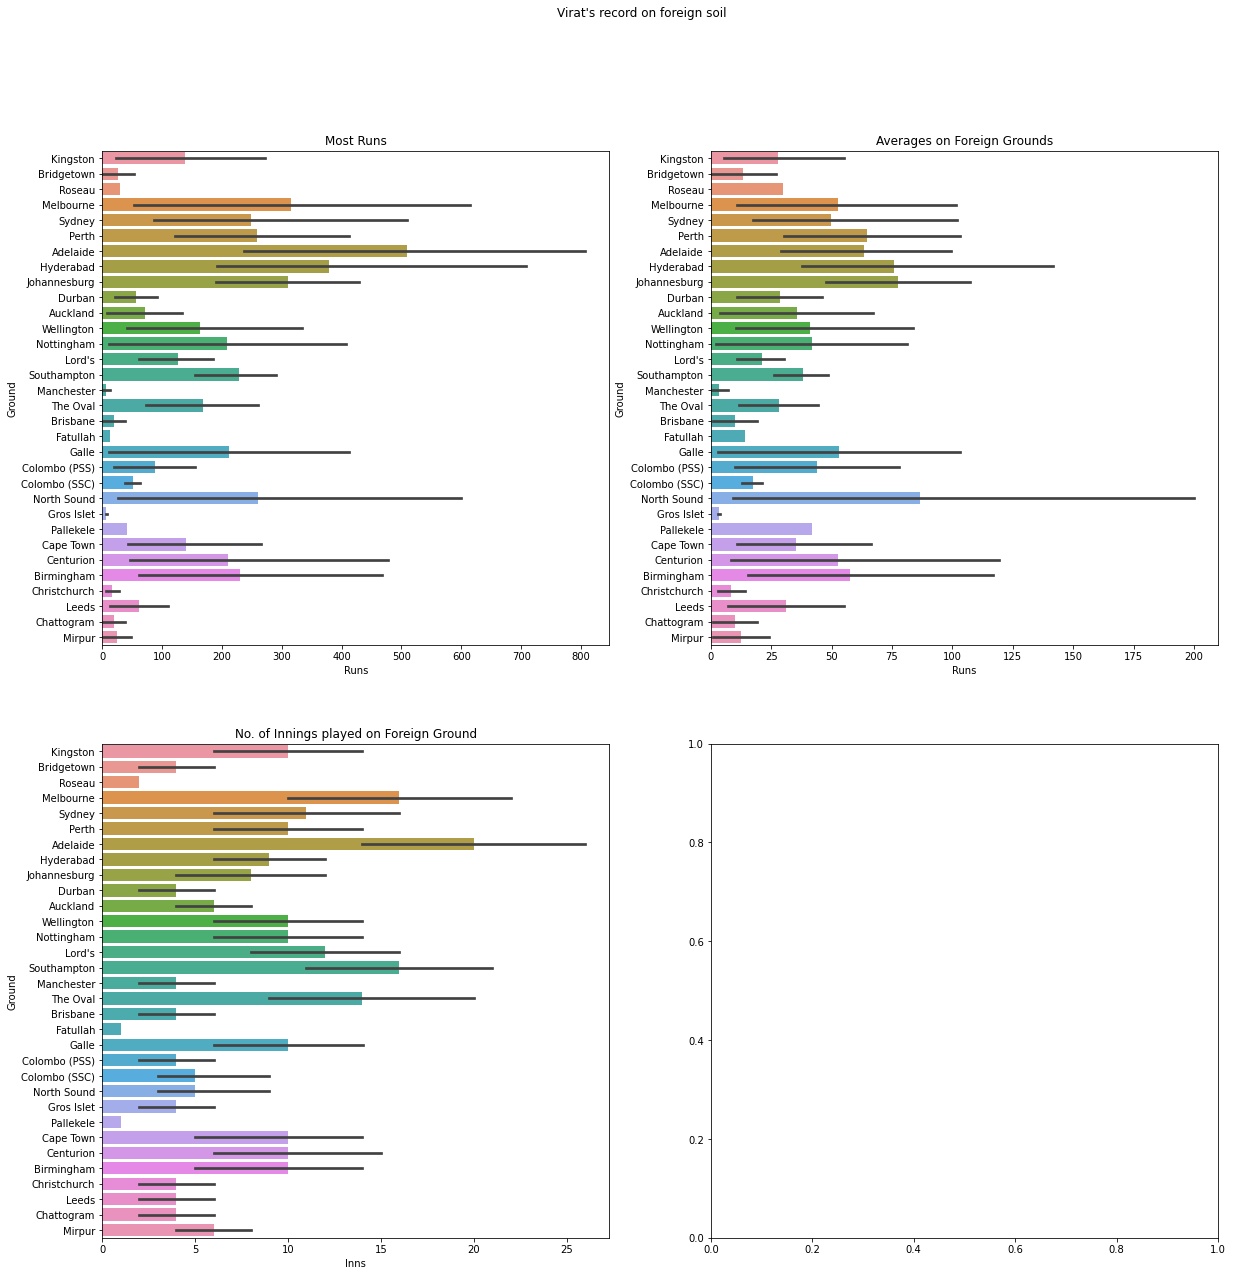

In [37]:
fig, axes = plt.subplots(2, 2,figsize=(20,20))
runs_foreign_grounds = Test.loc[Test['Away_Match'] == 'Away']
fig.suptitle("Virat's record on foreign soil")
axes[0,0].set_title('Most Runs')
axes[0,1].set_title('Averages on Foreign Grounds')
axes[1,0].set_title('No. of Innings played on Foreign Ground')
sn.barplot(x='Runs',y='Ground',data=runs_foreign_grounds,estimator=np.sum,orient = 'h',ax=axes[0,0])
sn.barplot(x='Runs',y='Ground',data=runs_foreign_grounds,estimator=np.mean,orient = 'h',ax=axes[0,1])
sn.barplot(x='Inns',y='Ground',data=runs_foreign_grounds,estimator=np.sum,orient='h',ax=axes[1,0])

<h3>Ducks of Virat Kohli</h3>

In [38]:
Test.loc[Test['Runs'] == 0].Opposition.value_counts()

v England        6
v Australia      3
v West Indies    2
v Sri Lanka      1
v Bangladesh     1
v New Zealand    1
Name: Opposition, dtype: int64

<b>At Home</b>

In [39]:
Test.loc[(Test['Runs'] == 0) & (Test['Away_Match'] == 'Home')].Opposition.value_counts()

v England        2
v Australia      1
v Sri Lanka      1
v Bangladesh     1
v New Zealand    1
Name: Opposition, dtype: int64

<b>At Away</b>

In [40]:
Test.loc[(Test['Runs'] == 0) & (Test['Away_Match'] == 'Away')].Opposition.value_counts()

v England        4
v West Indies    2
v Australia      2
Name: Opposition, dtype: int64

<b>On Particular Ground</b>

In [41]:
duck_on_grd = Test.loc[(Test['Runs'] == 0)].Ground.value_counts()
print(duck_on_grd)

Melbourne       2
Bridgetown      1
Lord's          1
Manchester      1
Pune            1
Eden Gardens    1
The Oval        1
Kingston        1
Indore          1
Chennai         1
Ahmedabad       1
Nottingham      1
Wankhede        1
Name: Ground, dtype: int64


<h2>Half Centuries</h2>

In [42]:
Test.loc[(Test['Runs'] >= 50) & ((Test['Runs'] < 100))].Opposition.value_counts()

v England         9
v West Indies     5
v Australia       5
v South Africa    4
v New Zealand     3
v Sri Lanka       2
Name: Opposition, dtype: int64

<b>At Home</b>

In [43]:
Test.loc[(Test['Runs'] >= 50) & ((Test['Runs'] < 100)) & (Test['Away_Match'] == 'Home')].Opposition.value_counts()

v England         4
v West Indies     3
v New Zealand     1
v Australia       1
v South Africa    1
v Sri Lanka       1
Name: Opposition, dtype: int64

<b>At Away</b>

In [44]:
Test.loc[(Test['Runs'] >= 50) & (Test['Runs'] < 100) & (Test['Away_Match'] == 'Away')].Opposition.value_counts()

v England         5
v Australia       4
v South Africa    3
v New Zealand     2
v West Indies     2
v Sri Lanka       1
Name: Opposition, dtype: int64

<b>On Particular Ground</b>

In [45]:
fifties_on_grd = Test.loc[(Test['Runs'] >= 50) & (Test['Runs'] < 100) ].Ground.value_counts()
print(fifties_on_grd)

Wankhede         3
Mohali           2
Johannesburg     2
Chennai          2
Melbourne        2
Delhi            2
Southampton      1
The Oval         1
Leeds            1
Adelaide         1
Kingston         1
North Sound      1
Visakhapatnam    1
Nottingham       1
Birmingham       1
Perth            1
Colombo (PSS)    1
Auckland         1
Bengaluru        1
Hyderabad        1
Cape Town        1
Name: Ground, dtype: int64


<h2>Centuries</h2>

In [46]:
print(Test.loc[Test['Runs'] >= 100].Opposition.value_counts())

v Australia       7
v England         5
v Sri Lanka       5
v New Zealand     3
v South Africa    3
v West Indies     2
v Bangladesh      2
Name: Opposition, dtype: int64


<b>At Home</b>

In [47]:
Test.loc[(Test['Runs'] >= 100) & (Test['Away_Match'] == 'Home')].Opposition.value_counts()

v England         3
v Sri Lanka       3
v New Zealand     2
v Australia       1
v West Indies     1
v South Africa    1
v Bangladesh      1
Name: Opposition, dtype: int64

<b>At Away</b>

In [48]:
Test.loc[(Test['Runs'] >= 100) & (Test['Away_Match'] == 'Away')].Opposition.value_counts()

v Australia       6
v South Africa    2
v Sri Lanka       2
v England         2
v New Zealand     1
v West Indies     1
v Bangladesh      1
Name: Opposition, dtype: int64

<b>On Particular Ground</b>

In [49]:
century_on_grd = Test.loc[Test['Runs'] >= 100].Ground.value_counts()
print(century_on_grd)

Adelaide         3
Nagpur           2
Galle            2
Eden Gardens     2
Wankhede         1
Perth            1
Rajkot           1
Nottingham       1
Birmingham       1
Centurion        1
Delhi            1
Hyderabad        1
Visakhapatnam    1
Bengaluru        1
Indore           1
North Sound      1
Sydney           1
Melbourne        1
Wellington       1
Johannesburg     1
Chennai          1
Pune             1
Name: Ground, dtype: int64


<h3>Computing probability of Virat hitting Century against each opponent</h3>

In [50]:
def prob_of_century_vs_countries(opponents):
    probs = []
    for opponent in opponents:
        Num_century_against = Test.loc[(Test['Runs'] >= 100) & (Test['Opposition'] == opponent)]
        Total_Innings = Test.loc[(Test['Opposition'] == opponent)]
        probs.append(len(Num_century_against)/len(Total_Innings))
    return probs

In [51]:
opponents = Test.Opposition.unique()
probs = prob_of_century_vs_countries(opponents)
century_df = pd.DataFrame({'Opponent':np.array(opponents),'Probs':probs}) 
century_df

,Opponent,Probs
0,v West Indies,0.105263
1,v Australia,0.194444
2,v New Zealand,0.142857
3,v England,0.100000
4,v South Africa,0.125000
5,v Bangladesh,0.222222
6,v Sri Lanka,0.277778


<AxesSubplot:title={'center':'Chances of Virat hitting Century against an opponent'}, xlabel='Opponent', ylabel='Probs'>

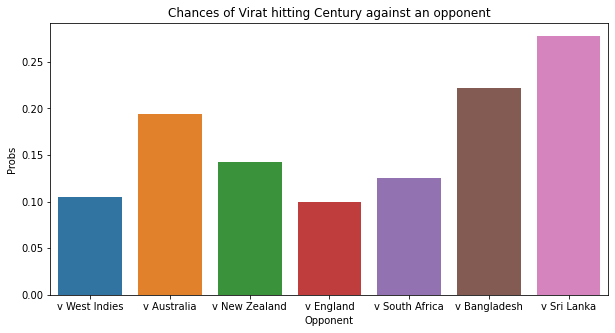

In [52]:
plt.figure(figsize=(10,5))
plt.title("Chances of Virat hitting Century against an opponent")
sn.barplot(x='Opponent',y='Probs',data=century_df)

<h3>Computing Averages against each opponent</h3>

<h3>Averages Away vs Home</h3>

<AxesSubplot:title={'center':'Averages Away vs Home'}, xlabel='Opposition', ylabel='Runs'>

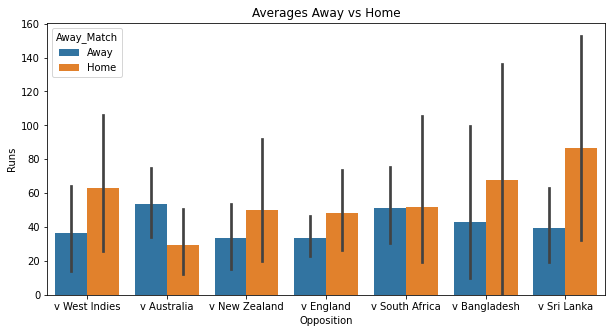

In [53]:
plt.figure(figsize=(10,5))
plt.title('Averages Away vs Home')
sn.barplot(x = 'Opposition', y='Runs',hue='Away_Match',data=Test,estimator=np.mean)

<h4>Quiet Impresive in Australia and South Africa</h4>

<h3>Runs Away vs Home</h3>

<AxesSubplot:title={'center':'Number of Runs against each opponent Away vs Home'}, xlabel='Opposition', ylabel='Runs'>

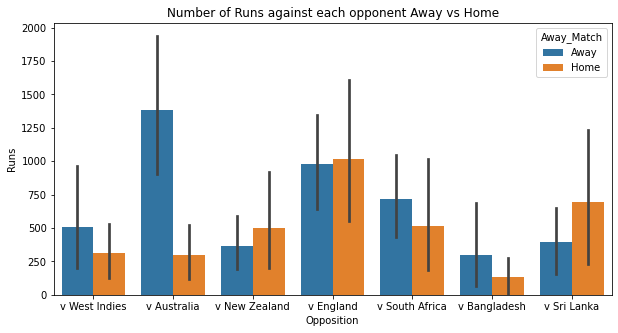

In [54]:
plt.figure(figsize=(10,5))
plt.title('Number of Runs against each opponent Away vs Home')
sn.barplot(x = 'Opposition', y='Runs',hue='Away_Match',data=Test,estimator=np.sum)

<p>Good Against England in both condition!!!, Also look at bins of Australia and South Africa. His Away record is just brilliant! </p>

<h3>Probability of Virat getting out on duck</h3>

In [55]:
def prob_of_duck_vs_countries(opponents):
    probs = []
    for opponent in opponents:
        Num_duck_against = Test.loc[(Test['Runs'] == 0) & (Test['Opposition'] == opponent)]
        Total_Innings = Test.loc[(Test['Opposition'] == opponent)]
        probs.append(len(Num_duck_against)/len(Total_Innings))
    return probs

In [56]:
opponents = Test.Opposition.unique()
probs_dk = prob_of_duck_vs_countries(opponents)
century_df = pd.DataFrame({'Opponent':np.array(opponents),'Probs':probs_dk}) 
century_df

,Opponent,Probs
0,v West Indies,0.105263
1,v Australia,0.083333
2,v New Zealand,0.047619
3,v England,0.120000
4,v South Africa,0.000000
5,v Bangladesh,0.111111
6,v Sri Lanka,0.055556


<AxesSubplot:title={'center':'Chances of Virat register duck against an opponent'}, xlabel='Opponent', ylabel='Probs'>

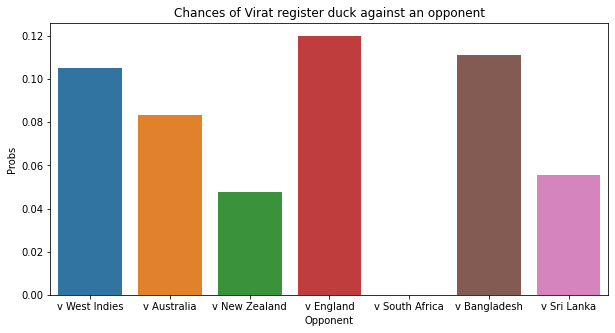

In [57]:
plt.figure(figsize=(10,5))
plt.title("Chances of Virat register duck against an opponent")
sn.barplot(x='Opponent',y='Probs',data=century_df)

<b>No ducks against SA</b>

<h1>Conclusion of Analysis</h1>

<p>To conclude things,
    <ul>
        <li>Has most number of ducks vs England but also significant number of centuries against them.</li>
        <li>Has most number of Centuries vs Australia in away matches. Also has pretty record there than his home playing against them.</li>
        <li>Has very impresive record against South Africa. Has not registered a single duck alongwith hitting plenty of Runs in Away and Home matches</li>
        <li>Has century in almost every conditions</li>
        <li>Good record against asian teams and New Zealand</li>
        <li>Average performance vs West Indies</li>
    </ul>
</p>